In [1]:
from google.colab import drive
drive.mount("/content/drive")

!pip3 install kaggle
!cp /content/drive/'My Drive'/ML/kaggle_binary /usr/local/bin/kaggle
!mkdir /root/.kaggle
!cp /content/drive/'My Drive'/ML/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# drive.flush_and_unmount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


!pip freeze --local > /content/drive/"My Drivr"/ML/installed_lib.txt

!pip3 install --upgrade --force-reinstall `cat/content/drive/"My Drive"/ML/installed_lib.txt


In [2]:
!kaggle competitions download titanic --path /content/titanic

  0% 0.00/33.9k [00:00<?, ?B/s]
100% 33.9k/33.9k [00:00<00:00, 28.0MB/s]


In [3]:
!unzip titanic/titanic.zip -d titanic/

Archive:  titanic/titanic.zip
  inflating: titanic/train.csv       
  inflating: titanic/test.csv        
  inflating: titanic/gender_submission.csv  


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [0]:
train_dataset = pd.read_csv('titanic/train.csv', index_col="PassengerId")
test_dataset = pd.read_csv('titanic/test.csv')

In [6]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
train_dataset.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train_dataset.dropna(how='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
train_dataset.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [12]:
train_dataset[train_dataset.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [13]:
train_dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
train_dataset.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [15]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
train_dataset.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [17]:
train_dataset.mean(axis=0)

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [18]:
train_dataset.sum(axis=0)

Survived                                                  342
Pclass                                                   2057
Name        Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex         malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                   21205.2
SibSp                                                     466
Parch                                                     340
Ticket      A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  28693.9
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


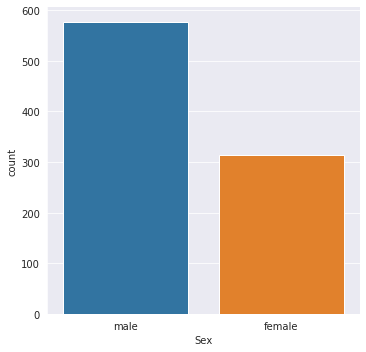

In [19]:
sns.factorplot('Sex', data=train_dataset, kind='count')

In [20]:
train_dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


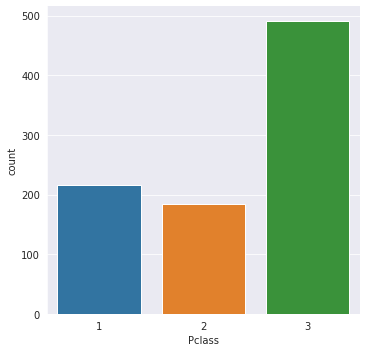

In [21]:
sns.factorplot('Pclass', data=train_dataset, kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


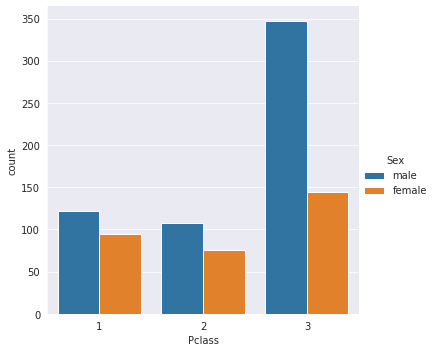

In [22]:
sns.factorplot('Pclass', data = train_dataset, hue='Sex', kind='count')

In [23]:
train_dataset.Name.str.count(r'[M|D]r[s]?.').astype(bool)

PassengerId
1       True
2       True
3      False
4       True
5       True
       ...  
887    False
888    False
889    False
890     True
891     True
Name: Name, Length: 891, dtype: bool

In [24]:
train_dataset['Relationship'] = train_dataset.Name.str.count(r'Mr[s]?.').astype(bool)
train_dataset['Relationship'].loc[train_dataset['Relationship'] == True] = 'Married'
train_dataset['Relationship'].loc[train_dataset['Relationship'] == False] = 'Unmarried'

test_dataset['Relationship'] = test_dataset.Name.str.count(r'Mr[s]?.').astype(bool)
test_dataset['Relationship'].loc[test_dataset['Relationship'] == True] = 'Married'
test_dataset['Relationship'].loc[test_dataset['Relationship'] == False] = 'Unmarried'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


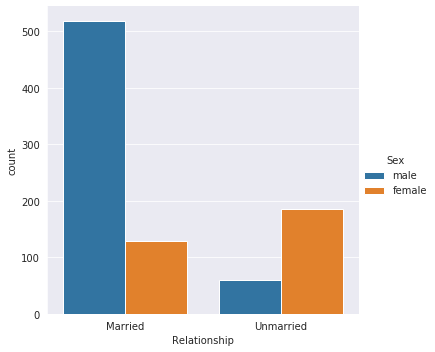

In [25]:
sns.factorplot('Relationship', hue = 'Sex', data = train_dataset, kind = 'count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


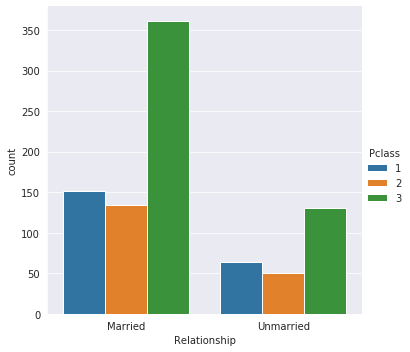

In [26]:
sns.factorplot('Relationship', hue = 'Pclass', data = train_dataset, kind = 'count')

In [0]:
def kids(passenger):
  age, sex = passenger
  if age < 18:
    return 'Child'
  else:
    return sex

train_dataset['Person'] = train_dataset[['Age','Sex']].apply(kids, axis=1)
test_dataset['Person'] = test_dataset[['Age','Sex']].apply(kids, axis=1)

In [28]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relationship,Person
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Married,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Married,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unmarried,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Married,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Married,male


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


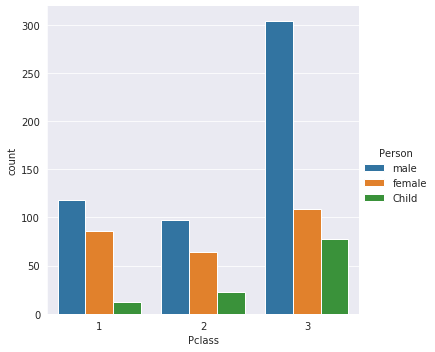

In [29]:
sns.factorplot('Pclass', data=train_dataset, hue='Person', kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


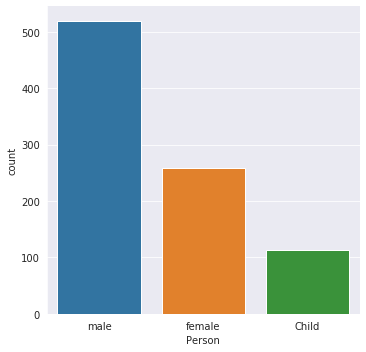

In [30]:
sns.factorplot('Person', data=train_dataset, kind='count')

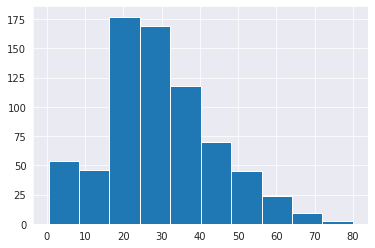

In [31]:
train_dataset['Age'].hist(bins=10)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


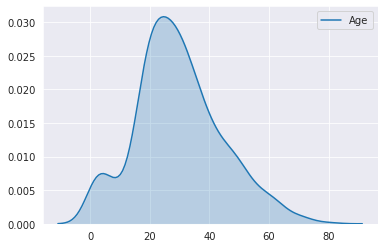

In [32]:
sns.kdeplot(train_dataset.Age, shade=True)

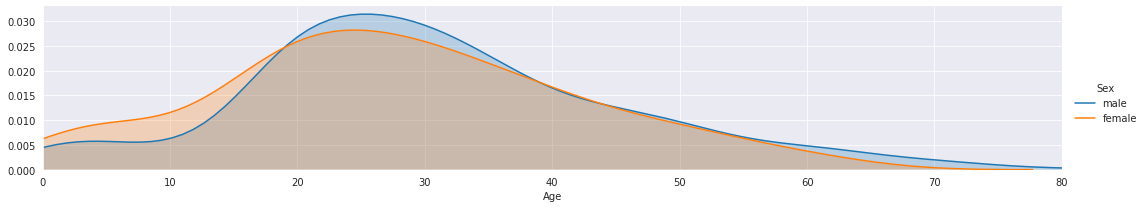

In [33]:
as_fig = sns.FacetGrid(train_dataset, hue='Sex', aspect=5)

as_fig.map(sns.kdeplot, 'Age', shade=True)

oldest = train_dataset['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

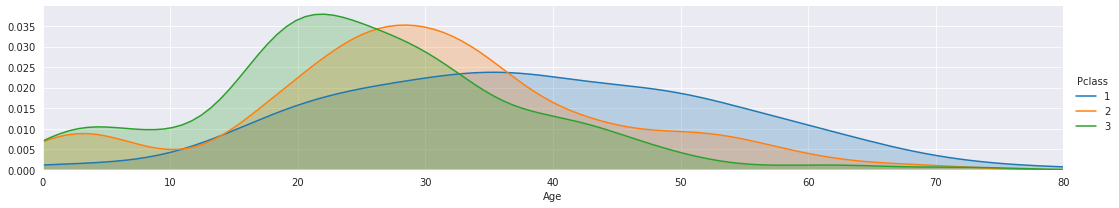

In [34]:
as_fig = sns.FacetGrid(train_dataset, hue='Pclass', aspect=5)
as_fig.map(sns.kdeplot, 'Age', shade=True)
oldest = train_dataset['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [0]:
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].mean())
test_dataset['Age'] = test_dataset['Age'].fillna(train_dataset['Age'].mean())

In [0]:
train_dataset.drop('Cabin', axis=1, inplace=True)
test_dataset.drop('Cabin', axis=1, inplace=True)

In [37]:
train_dataset.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [0]:
train_dataset.Embarked.fillna('S', inplace=True)
test_dataset.Embarked.fillna('S', inplace=True)

In [39]:
train_dataset.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
train_dataset.isna().values.any()

False

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


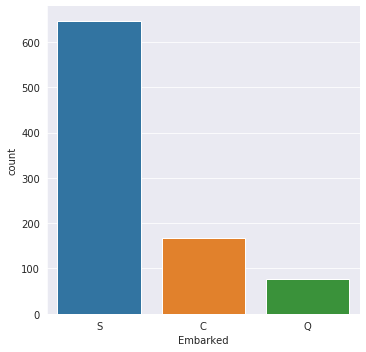

In [41]:
sns.factorplot('Embarked', data=train_dataset, kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


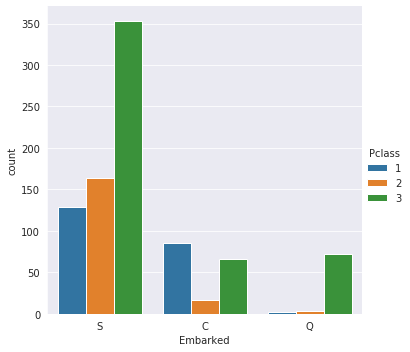

In [42]:
sns.factorplot('Embarked', data = train_dataset, hue = 'Pclass', kind = 'count')

In [43]:
train_dataset['Trip'] = train_dataset.Parch + train_dataset.SibSp

train_dataset['Trip'].loc[train_dataset['Trip'] > 0] = 'Family'
train_dataset['Trip'].loc[train_dataset['Trip'] == 0] = 'Alone'

test_dataset['Trip'] = test_dataset.Parch + test_dataset.SibSp

test_dataset['Trip'].loc[test_dataset['Trip'] > 0] = 'Family'
test_dataset['Trip'].loc[test_dataset['Trip'] == 0] = 'Alone'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relationship,Person,Trip
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Married,male,Family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Married,female,Family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unmarried,female,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Married,female,Family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Married,male,Alone


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


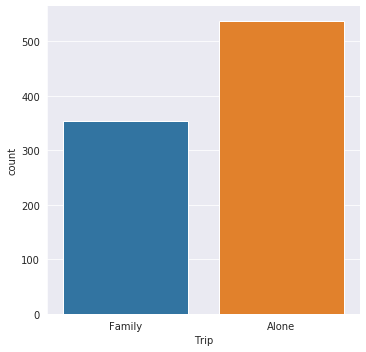

In [45]:
sns.factorplot('Trip', kind='count', data=train_dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


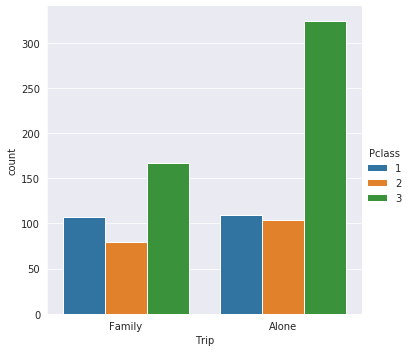

In [46]:
sns.factorplot('Trip', hue='Pclass', kind='count', data=train_dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


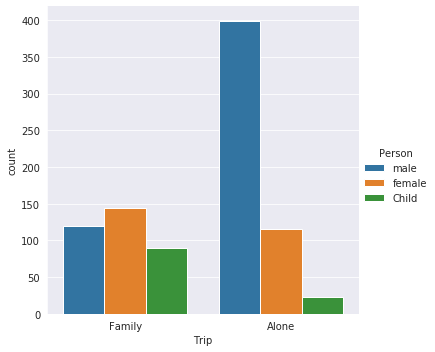

In [47]:
sns.factorplot('Trip', hue='Person', kind='count', data=train_dataset)

In [48]:
train_dataset.loc[(train_dataset['Person'] == 'Child') & (train_dataset['Trip'] == 'Alone')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relationship,Person,Trip
PassengerId,,,,,,,,,,,,,
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Unmarried,Child,Alone
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,Unmarried,Child,Alone
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S,Unmarried,Child,Alone
115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,C,Unmarried,Child,Alone
139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,S,Married,Child,Alone
157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,Q,Unmarried,Child,Alone
164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,S,Married,Child,Alone
209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,Q,Unmarried,Child,Alone
221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S,Married,Child,Alone


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


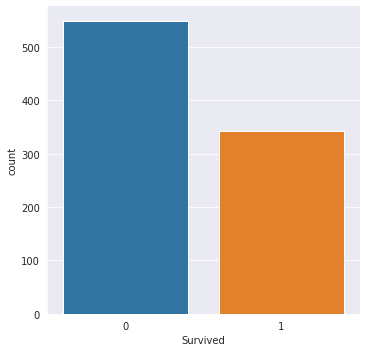

In [49]:
sns.factorplot('Survived', data = train_dataset, kind = 'count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


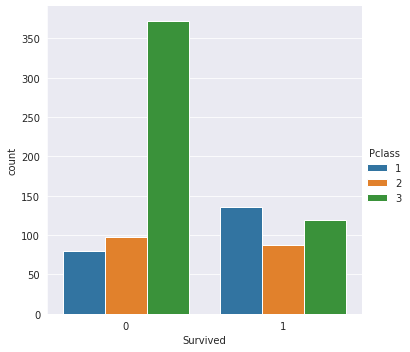

In [50]:
sns.factorplot('Survived', data = train_dataset, kind='count', hue = 'Pclass')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


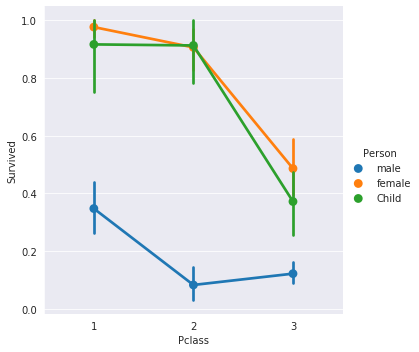

In [51]:
sns.factorplot('Pclass', 'Survived', data = train_dataset, hue = 'Person')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


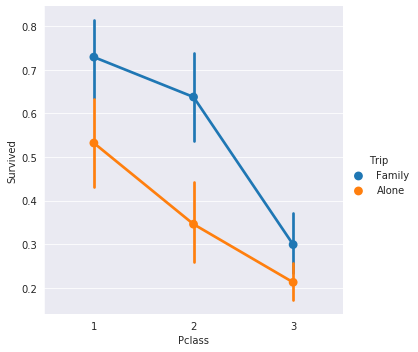

In [52]:
sns.factorplot('Pclass', 'Survived', data = train_dataset, hue = 'Trip')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


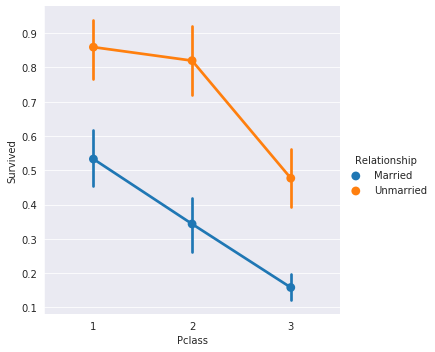

In [53]:
sns.factorplot('Pclass', 'Survived', data = train_dataset, hue = 'Relationship')

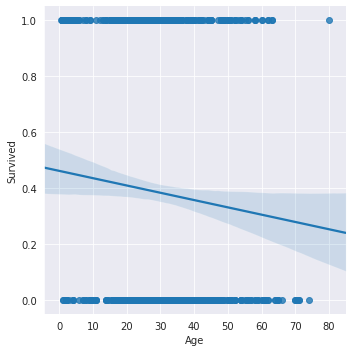

In [54]:
sns.lmplot('Age', 'Survived', data=train_dataset)

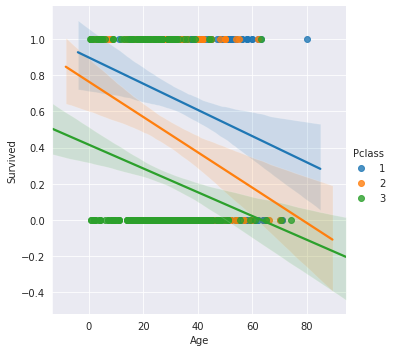

In [55]:
sns.lmplot('Age', 'Survived', data = train_dataset, hue='Pclass')

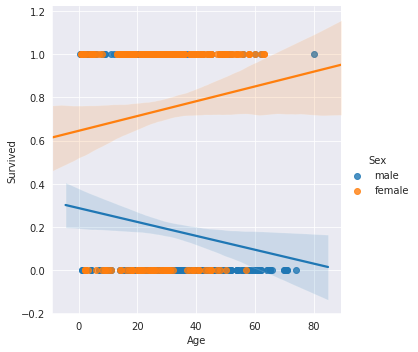

In [56]:
sns.lmplot('Age', 'Survived', data=train_dataset, hue='Sex')

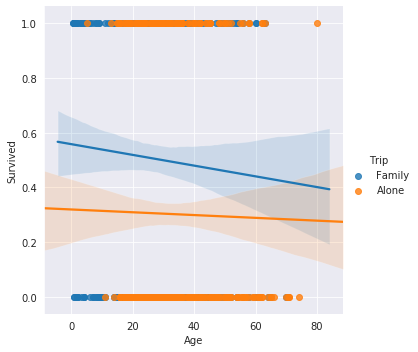

In [57]:
sns.lmplot('Age', 'Survived', data = train_dataset, hue='Trip')

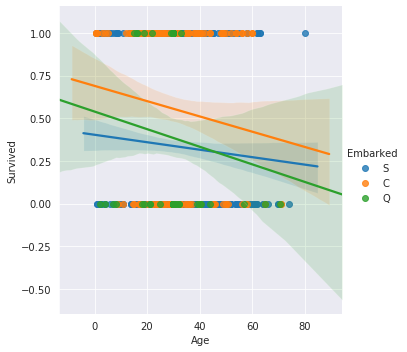

In [58]:
sns.lmplot('Age', 'Survived', data = train_dataset, hue = 'Embarked')

In [0]:
from sklearn.preprocessing import OneHotEncoder
temp = train_dataset.values
para = np.unique(temp[:,11])
ohe = OneHotEncoder(categories=[para])
tmp = ohe.fit_transform(temp[:,11].reshape(-1,1)).toarray()
temp = np.append(temp, tmp, axis=1)

In [60]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
Relationship    891 non-null object
Person          891 non-null object
Trip            891 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 137.5+ KB


In [0]:
person_dummies = pd.get_dummies(train_dataset['Person'])
trip_dummies = pd.get_dummies(train_dataset['Trip'])
embarked_dummies = pd.get_dummies(train_dataset['Embarked'])
relationship_dummies = pd.get_dummies(train_dataset['Relationship'])
pclass_dummies = pd.get_dummies(train_dataset['Pclass'])
pclass_dummies.columns = ['class1', 'class2', 'class3']

person_test_dummies = pd.get_dummies(test_dataset['Person'])
trip_test_dummies = pd.get_dummies(test_dataset['Trip'])
embarked_test_dummies = pd.get_dummies(test_dataset['Embarked'])
relationship_test_dummies = pd.get_dummies(test_dataset['Relationship'])
pclass_test_dummies = pd.get_dummies(test_dataset['Pclass'])
pclass_test_dummies.columns = ['class1', 'class2', 'class3']

In [0]:
test_dataset['Fare'].fillna(train_dataset['Fare'].mean(), inplace =True)

In [0]:
import math

train_dataset['Age'] = train_dataset['Age'].apply(math.ceil)
train_dataset['Fare'] = train_dataset['Fare'].apply(math.ceil)

test_dataset['Age'] = test_dataset['Age'].apply(math.ceil)
test_dataset['Fare'] = test_dataset['Fare'].apply(math.ceil)

In [0]:
train_dataset = pd.concat([train_dataset, person_dummies, trip_dummies, embarked_dummies, pclass_dummies, relationship_dummies], axis=1)

test_dataset = pd.concat([test_dataset, person_test_dummies, trip_test_dummies, embarked_test_dummies, pclass_test_dummies, relationship_test_dummies], axis=1)

In [65]:
train_dataset.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relationship,Person,Trip,Child,female,male,Alone,Family,C,Q,S,class1,class2,class3,Married,Unmarried
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,8,S,Married,male,Family,0,0,1,0,1,0,0,1,0,0,1,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,72,C,Married,female,Family,0,1,0,0,1,1,0,0,1,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S,Unmarried,female,Alone,0,1,0,1,0,0,0,1,0,0,1,0,1


In [66]:
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relationship,Person,Trip,Child,female,male,Alone,Family,C,Q,S,class1,class2,class3,Married,Unmarried
0,892,3,"Kelly, Mr. James",male,35,0,0,330911,8,Q,Married,male,Alone,0,0,1,1,0,0,1,0,0,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S,Married,female,Family,0,1,0,0,1,0,0,1,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,10,Q,Married,male,Alone,0,0,1,1,0,0,1,0,0,1,0,1,0


In [0]:
train_dataset.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Person', 'Trip', 'female', 'Alone', 'C', 'class2', 'Unmarried', 'Relationship'], axis=1, inplace=True)
test_dataset.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Person', 'Trip', 'female', 'Alone', 'C', 'class2', 'Unmarried', 'Relationship'], axis=1, inplace=True)

In [68]:
train_dataset

,Survived,Age,Fare,Child,male,Family,Q,S,class1,class3,Married
PassengerId,,,,,,,,,,,
1,0,22,8,0,1,1,0,1,0,1,1
2,1,38,72,0,0,1,0,0,1,0,1
3,1,26,8,0,0,0,0,1,0,1,0
4,1,35,54,0,0,1,0,1,1,0,1
5,0,35,9,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,27,13,0,1,0,0,1,0,0,0
888,1,19,30,0,0,0,0,1,1,0,0
889,0,30,24,0,0,1,0,1,0,1,0


In [0]:
X = train_dataset.iloc[:, 1:].values
y = train_dataset.iloc[:, 0].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
train_dataset.isna().sum()

Survived    0
Age         0
Fare        0
Child       0
male        0
Family      0
Q           0
S           0
class1      0
class3      0
Married     0
dtype: int64

In [72]:
X_train

array([[30, 16,  0, ...,  0,  1,  1],
       [31, 11,  0, ...,  0,  0,  1],
       [31, 38,  0, ...,  0,  0,  1],
       ...,
       [30,  8,  0, ...,  0,  1,  1],
       [36, 18,  0, ...,  0,  1,  1],
       [60, 39,  0, ...,  0,  0,  1]])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
X_train

array([[ 0.01459956, -0.32464536, -0.38521046, ..., -0.56004744,
         0.89329715,  0.60764362],
       [ 0.09103255, -0.42443275, -0.38521046, ..., -0.56004744,
        -1.11944833,  0.60764362],
       [ 0.09103255,  0.11441913, -0.38521046, ..., -0.56004744,
        -1.11944833,  0.60764362],
       ...,
       [ 0.01459956, -0.48430518, -0.38521046, ..., -0.56004744,
         0.89329715,  0.60764362],
       [ 0.47319751, -0.28473041, -0.38521046, ..., -0.56004744,
         0.89329715,  0.60764362],
       [ 2.30758932,  0.13437661, -0.38521046, ..., -0.56004744,
        -1.11944833,  0.60764362]])

In [75]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


In [76]:
classifier = Sequential()

classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





712/712 [==============================] - 6s 8ms/step - loss: 0.6806 - acc: 0.6180
Epoch 2/100
712/712 [==============================] - 1s 1ms/step - loss: 0.5834 - acc: 0.6896
Epoch 3/100
712/712 [==============================] - 1s 844us/step - loss: 0.5192 - acc: 0.7851
Epoch 4/100
712/712 [==============================] - 1s 843us/step - loss: 0.4873 - acc: 0.7837
Epoch 5/100
712/712 [==============================] - 1s 949us/step - loss: 0.4672 - acc: 0.7893
Epoch 6/100
712/712 [==============================] - 1s 866us/step - loss: 0.4551 - acc: 0.7935
Epoch 7/100
712/712 [==============================] - 1s 796us/step - loss: 0.4485 - acc: 0.7935
Epoch 8/100
712/712 [==============================] - 1s 846us/step - loss: 0.4418 - acc: 0.7963
Epoch 9/100
712/712 [==============================] - 1s 823us/step - loss: 0.4376 - acc: 0.7992
Epoch 10/100
71

In [0]:
y_pred = classifier.predict(X_test)
y_pred = np.around(y_pred).astype(int)

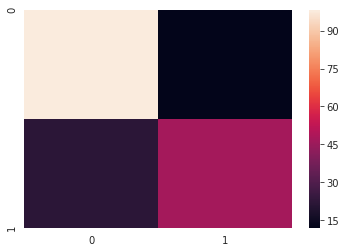

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [79]:
cm

array([[98, 12],
       [22, 47]])

In [80]:
test_dataset

,PassengerId,Age,Fare,Child,male,Family,Q,S,class1,class3,Married
0,892,35,8,0,1,0,1,0,0,1,1
1,893,47,7,0,0,1,0,1,0,1,1
2,894,62,10,0,1,0,1,0,0,0,1
3,895,27,9,0,1,0,0,1,0,1,1
4,896,22,13,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30,9,0,1,0,0,1,0,1,1
414,1306,39,109,0,0,0,0,0,1,0,0
415,1307,39,8,0,1,0,0,1,0,1,1
416,1308,30,9,0,1,0,0,1,0,1,1


In [0]:
test_set = test_dataset.iloc[:,1:].values
test_set = sc.transform(test_set)

In [0]:
result = np.around(classifier.predict(test_set)).astype(int)

In [0]:
result = result.reshape(418,)

In [84]:
test_dataset.PassengerId.values.shape

(418,)

In [85]:
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
predictions = pd.DataFrame({'PassengerId':test_dataset.PassengerId.values,'Survived':result})

In [0]:
predictions.to_csv("submission.csv", index = False)

In [0]:
!mv submission.csv drive/'My Drive'/ML/kaggle/

In [0]:
drive.flush_and_unmount()